# Image Classification - Flower recognition
- in this notebook I explain how to model an image recognition model using **CNN** .
- you can see the plotting in the end of notebook.
- my notebook hasn't optimal model in this data set. if you want to take an optimal model you can se the edition in future on this notebook.
- if you like my notebook , support my by upvote it.
- **My name is Abhishek Sharma**

Connecting our file with Google Drive so that we can download the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries and collecting images

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L1,L2
#dl libraraies
from keras import backend as K
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

# Loading Dataset

About Dataset:
This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Content:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

In [3]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/flowers/rose'

In [4]:
def assign_label(img,flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))


In [6]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:10<00:00, 71.76it/s] 

764


In [7]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:09<00:00, 75.27it/s] 

1497


In [8]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:14<00:00, 69.54it/s] 

2481


In [9]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:16<00:00, 63.93it/s] 

3533


In [10]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:12<00:00, 61.80it/s] 

4317


# Visualization

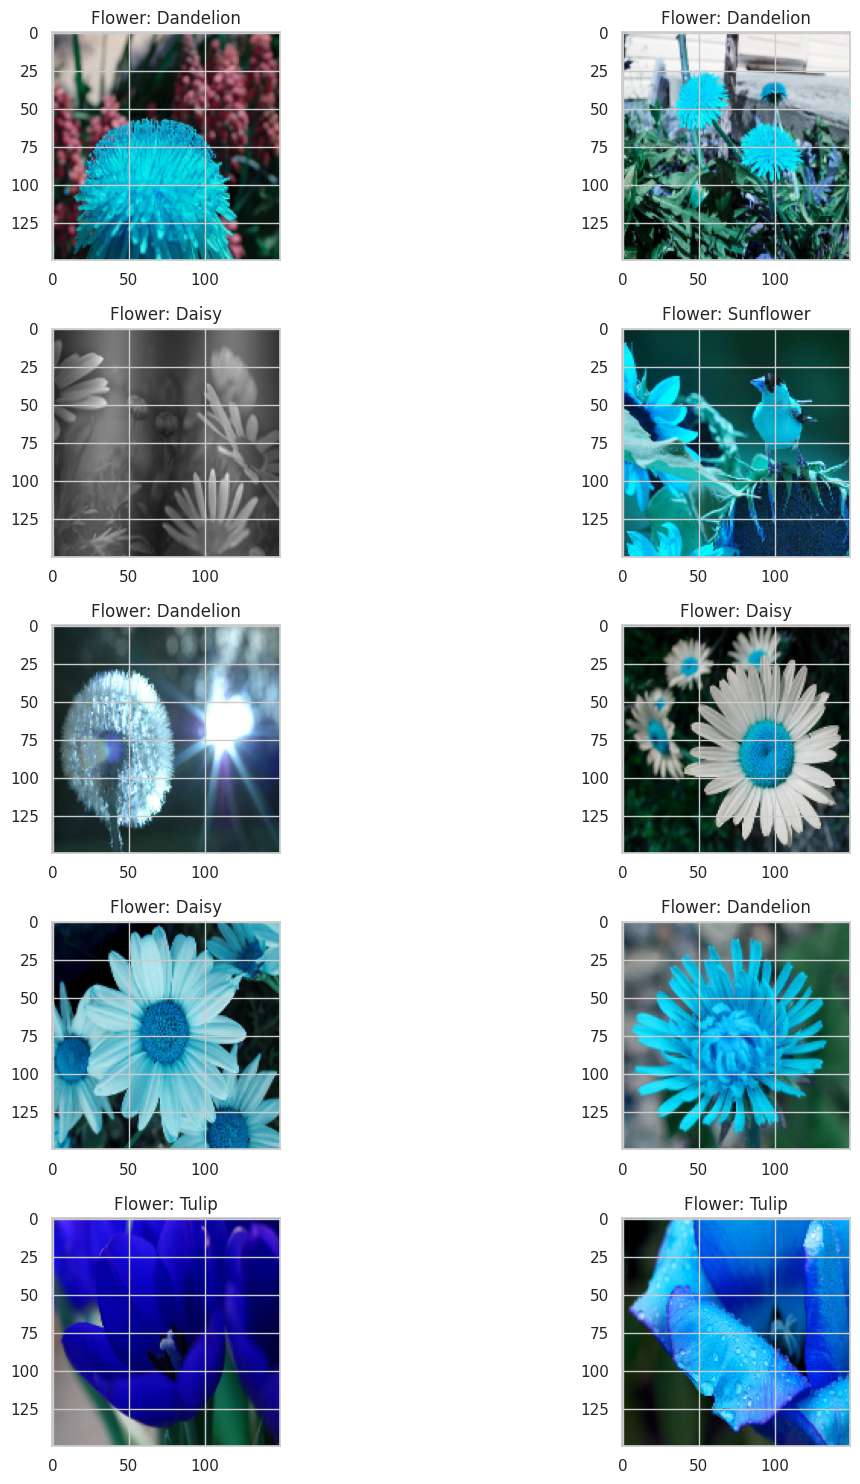

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()

# Dataset Preprocessing

In [12]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [13]:
X.shape

(4317, 150, 150, 3)

In [14]:
Y.shape

(4317, 5)

## Train Test Split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## **modeling**
- I hanve use Conv@D to convolution images.
- using Maxpooling2D to reduce the size and resolution of images.
- flatten to make data set 1 dimension.

In [16]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=40, kernel_size=(3,3),input_shape = (150,150,3), activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=50, kernel_size=(3,3),input_shape = (150,150,3), activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(filters=55, kernel_size=(3,3),input_shape = (150,150,3), activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(filters=60, kernel_size=(3,3),input_shape = (150,150,3), activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dense(200, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dense(200, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dense(100, activation='relu', kernel_regularizer=L2(0.01)))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(5, activation='softmax'))



In [17]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [18]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 40)      1120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 40)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 50)        18050     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 55)        24805     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 55)        0

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## ImageGenerator to prevent Overfitting

In [22]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Fitting my model

Here I have used 50 epoches

In [23]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 35s 840ms/step - loss: 6.1596 - accuracy: 0.2708 - val_loss: 4.3814 - val_accuracy: 0.3333
Epoch 2/50
25/25 [==============================] - 21s 841ms/step - loss: 3.6790 - accuracy: 0.3159 - val_loss: 3.0303 - val_accuracy: 0.3722
Epoch 3/50
25/25 [==============================] - 23s 829ms/step - loss: 2.6382 - accuracy: 0.3889 - val_loss: 2.2499 - val_accuracy: 0.4546
Epoch 4/50
25/25 [==============================] - 19s 775ms/step - loss: 2.0033 - accuracy: 0.4651 - val_loss: 1.8610 - val_accuracy: 0.5000
Epoch 5/50
25/25 [==============================] - 21s 854ms/step - loss: 1.7146 - accuracy: 0.4915 - val_loss: 1.6018 - val_accuracy: 0.4907
Epoch 6/50
25/25 [==============================] - 22s 863ms/step - loss: 1.5353 - accuracy: 0.5111 - val_loss: 1.4630 - val_accuracy: 0.5417
Epoch 7/50
25/25 [==============================] - 21s 850ms/step - loss: 1.4312 - accuracy: 0.5301 - val_loss: 1.3422 - val_accuracy: 0.5796

# Graphs

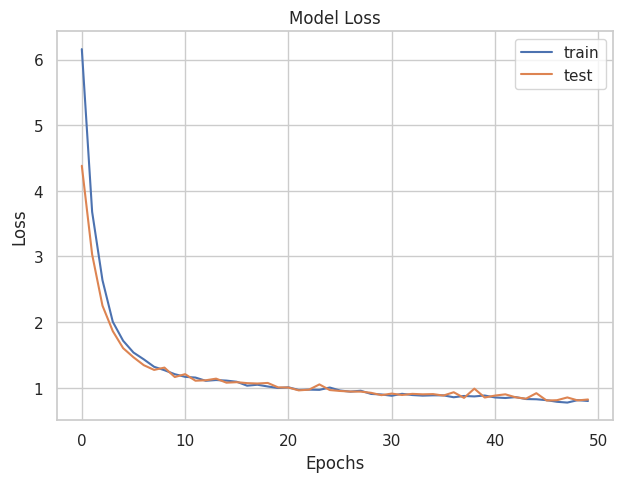

In [24]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

the above graph shows that,  the Test and Train losses are highest in the initial and at the last when the number of epoches increases loss also decreases.

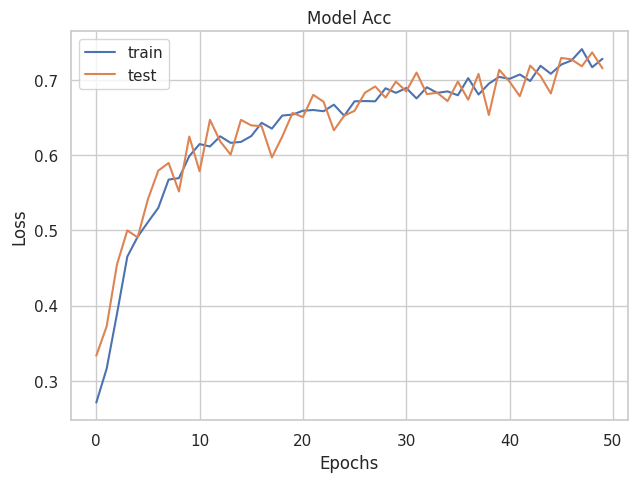

In [25]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Acc')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

the above graph shows the test and train accuracy of the model with respect to the increase in the number of epoches

In [26]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 1s 11ms/step


In [27]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [28]:
y_test1=np.copy(y_test)
print(y_test1.shape)
y_test1.flatten()

(1080, 5)


array([0., 0., 1., ..., 1., 0., 0.], dtype=float32)

In [29]:
prop_class1=np.copy(prop_class)
print(prop_class1.shape)
prop_class1.flatten()

(8,)


array([ 1,  2,  5,  7,  9, 10, 12, 13])

In [30]:
pred_digits.shape

(1080,)

In [31]:
y_test.shape

(1080, 5)

# Model Evaluation

Evaluation includes the hyperparameter tuning if the model is not giving good results. You can also play with different parameters for better predictions.

In [32]:
model.evaluate(x_test,y_test)

34/34 [==============================] - 1s 15ms/step - loss: 0.8196 - accuracy: 0.7157


[0.8195780515670776, 0.7157407402992249]

# Saving the model

In [ ]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')

Printing the classes of flowers

From here, my system got crashed 2 times due to less computational techniques.

In [ ]:
x_train.class_indices

# Checking the results

In [ ]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('img.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
if(result[0][i]==1):
	print(list_[i])
	break


In [ ]:
#Input image
test_image = image.load_img('img2.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
if(result[0][i]==1):
	print(list_[i])
	break


## Finally
- my trying to make the model accuracy more better.